## Логистическая регрессия

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Реализуйте обучение логистической регрессии с $L^1$ и $L^2$ регуляризацией с помощью метода Stochastic Gradient Descent (SGD)

In [5]:
p = np.random.permutation(3)
p

array([1, 0, 2])

#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=11, penalty='l2'):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
       
       

        
        
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        m = len(X)
        t0, t1 = 5., 50  # learning schedule hyperparameters

        self.theta = np.random.randn(2,1)  # random initialization

        for epoch in range(self.max_epoch):
            p = np.random.permutation(m)
            for idx in p:
                random_index = np.random.randint(m)
                xi = X[[idx], :]
                yi = y[idx]
                gradients = 2 * xi.T.dot(xi.dot(self.theta) - yi)
                self.theta = self.theta - self.alpha * gradients
                
                return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        y_hat =  np.sign(X.dot(self.theta))
        
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''

        
        return y_hat_proba

In [14]:
X[]

(array([[ 5.10023581e+00, -2.69111611e+00],
        [ 7.86133980e+00, -5.90275828e-01],
        [ 3.03408318e+00, -3.87586870e+00],
        [ 4.27296419e+00, -2.48115650e+00],
        [ 5.11589775e+00, -1.18894612e+00],
        [ 6.68141026e+00, -5.51816051e-01],
        [ 4.68251252e+00, -2.11149017e+00],
        [ 5.00051149e+00, -1.68815112e+00],
        [ 4.19226260e+00, -2.95938987e+00],
        [ 3.21885639e+00, -2.53373075e+00],
        [ 5.48042789e+00,  9.65286729e-01],
        [ 3.38675247e+00, -2.88528098e+00],
        [ 2.31845149e+00, -4.57929624e+00],
        [ 4.21922422e+00, -1.78635389e+00],
        [ 6.70403815e+00, -1.65073636e+00],
        [ 5.06724378e+00, -1.42142792e+00],
        [ 1.52880530e+00, -2.47440858e+00],
        [ 4.73452345e+00, -1.19659111e+00],
        [ 6.30356977e+00, -1.62232867e+00],
        [ 4.04654587e+00, -1.53198075e+00],
        [ 2.36997309e+00, -1.89717198e+00],
        [ 7.42616309e+00,  1.32563647e+00],
        [ 3.84288855e+00, -1.542

In [30]:
idx = 1
xi = y[198]   
xi

1.0

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

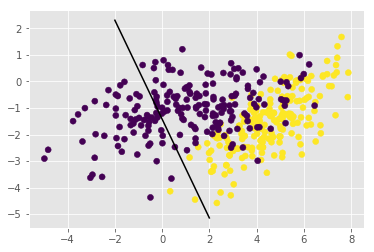

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx, yy, "k-")


In [8]:
model = MySGDClassifier()
model.fit(X, y)
model.theta


array([[1.31328632],
       [0.70526876]])

In [9]:
model.theta[0]
xx = np.array([-2,2])
yy = np.array([(-1-model.theta[0]*xx[0])/model.theta[1],(-1-model.theta[0]*xx[1])/model.theta[1]])
xx,yy

(array([-2,  2]), array([[ 2.30631604],
        [-5.14211442]]))

array([[0.93853386],
       [0.39295818]])

In [53]:
## Your Code Here

## Анализ сходимости

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/эпохи (выбрать одно) для разных `alpha`.

In [ ]:
## Your Code Here